In [3]:
# Imports
import os
from predicting_nails.params import *
from predicting_nails.prediction.get_data import get_simple_data, load_simple_data
from PIL import Image

In [4]:
# Get resized (224,224,3) and labeled (0,1) data from your local directory for the simple model

nb_healthy = 50     #defines the number of healthy images to be downloaded and loaded
nb_disease = 50     #defines the number of diseased images to be downloaded and loaded

if os.path.exists(os.path.join(LOCAL_DATA_PATH, "dataset_for_model_1")) == False:
    get_simple_data(nb_healthy = nb_healthy, nb_disease = nb_disease)
    X, y = load_simple_data(LOCAL_DATA_PATH, nb_healthy = nb_healthy, nb_disease = nb_disease)
else:
    X, y = load_simple_data(LOCAL_DATA_PATH, nb_healthy = nb_healthy, nb_disease = nb_disease)

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [59]:
image_array = X[20]
image_array

array([[[ 74,  71,  68],
        [ 73,  69,  66],
        [ 70,  67,  63],
        ...,
        [ 41,  41,  43],
        [ 42,  41,  43],
        [ 40,  38,  41]],

       [[ 88,  87,  83],
        [ 82,  78,  75],
        [ 72,  69,  65],
        ...,
        [ 42,  41,  43],
        [ 39,  39,  41],
        [ 40,  38,  41]],

       [[108, 107, 103],
        [ 85,  83,  79],
        [ 71,  70,  66],
        ...,
        [ 41,  41,  43],
        [ 39,  39,  41],
        [ 40,  38,  41]],

       ...,

       [[ 75,  74,  72],
        [ 79,  77,  75],
        [ 97,  96,  94],
        ...,
        [ 38,  38,  38],
        [ 39,  39,  39],
        [ 38,  38,  38]],

       [[ 75,  74,  72],
        [ 82,  81,  79],
        [102, 101,  99],
        ...,
        [ 36,  36,  37],
        [ 39,  39,  39],
        [ 49,  49,  49]],

       [[ 76,  75,  73],
        [ 84,  83,  81],
        [ 91,  89,  87],
        ...,
        [ 38,  37,  38],
        [ 51,  50,  50],
        [ 60,  59,  58]]

In [17]:
!pwd

/home/hubertus/code/ariannamng/predicting_nail_diseases


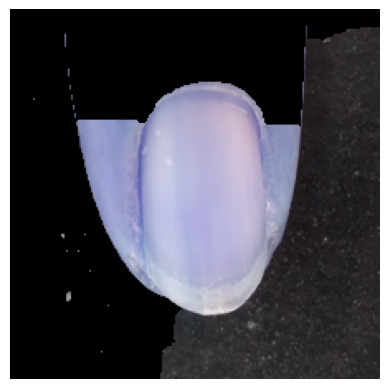

In [60]:

# Assuming 'image_array' is your input image in NumPy array form
# image_array = cv2.imread('path_to_your_image.jpg') # Uncomment if loading from file

def remove_background_with_grabcut(image_array):
    # Make a copy of the image
    image = image_array.copy()

    # Create an initial mask
    mask = np.zeros(image.shape[:2], np.uint8)

    # Create temporary arrays used by the GrabCut algorithm
    bgd_model = np.zeros((1, 65), np.float64)
    fgd_model = np.zeros((1, 65), np.float64)

    # Define a rectangle around the foreground object
    height, width = image.shape[:2]
    rect = (10, 10, width-10, height-10)  # Adjust as needed

    # Apply the GrabCut algorithm
    cv2.grabCut(image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

    # Modify the mask so that sure and likely background regions are set to 0, sure and likely foreground regions are set to 1
    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

    # Multiply the image with the new mask to remove the background
    image = image * mask2[:, :, np.newaxis]

    return image


# Remove background
result_image = remove_background_with_grabcut(image_array)

# Display the result
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()